In [402]:
import numpy as np
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [403]:
validation_set = tf.keras.utils.image_dataset_from_directory(
      r"C:\Users\thanu\untitled1\insectdetection\dataset\valid",
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False
)
class_name = validation_set.class_names
print(class_name)

Found 3707 files belonging to 12 classes.
['ants', 'bees', 'beetle', 'catterpillar', 'earthworms', 'earwig', 'grasshopper', 'moth', 'slug', 'snail', 'wasp', 'weevil']


In [404]:
cnn = tf.keras.models.load_model('trained_insect_detection.keras')

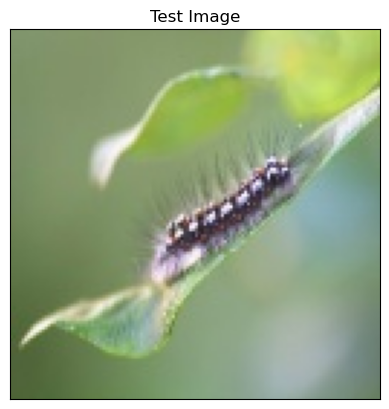

In [405]:
import cv2
image_path = r"C:\Users\thanu\untitled1\insectdetection\dataset\train\catterpillar\catterpillar (414).jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB) 
plt.imshow(image)
plt.title('Test Image')
plt.xticks([])
plt.yticks([])
plt.show()

In [406]:
image = tf.keras.preprocessing.image.load_img(image_path,target_size=(128,128))
input_arr = tf.keras.preprocessing.image.img_to_array(image)
input_arr = np.array([input_arr])  # Convert single image to a batch.
predictions = cnn.predict(input_arr)

1/1 [==============================] - 0s 147ms/step


C:\Users\thanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\thanu\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


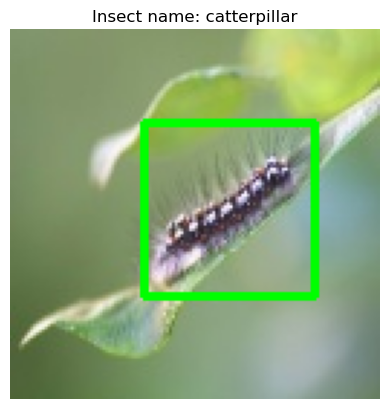

In [407]:


image = cv2.imread(image_path)
if image is None:
    print("Error: Failed to load the image.")
else:
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    keypoints, descriptors = sift.detectAndCompute(gray, None)
    descriptors = np.array(descriptors)
    num_clusters = 5  
    kmeans = KMeans(n_clusters=num_clusters, random_state=0)
    kmeans.fit(descriptors)
    labels = kmeans.labels_
    cluster_counts = np.bincount(labels)
    most_populous_cluster = np.argmax(cluster_counts)

    output_image = image.copy()

    cluster_keypoints = [keypoints[i].pt for i in range(len(keypoints)) if labels[i] == most_populous_cluster]
    if cluster_keypoints:
        cluster_keypoints = np.array(cluster_keypoints)
        x_min, y_min = np.min(cluster_keypoints, axis=0)
        x_max, y_max = np.max(cluster_keypoints, axis=0)
        cv2.rectangle(output_image, (int(x_min), int(y_min)), (int(x_max), int(y_max)), (0, 255, 0), 2)

    output_image_rgb = cv2.cvtColor(output_image, cv2.COLOR_BGR2RGB)

    model_prediction = class_name[result_index]
    plt.imshow(output_image_rgb)
    plt.title(f"Insect name: {model_prediction}")
    plt.axis('off')
    plt.show()
